In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

## Preparing Data
For this Part we will be using a dataset giving the living areas and prices of 47 houses from Portland, Oregon . Also we have rescale the data so that we get 0 as mean and 1 as Standarad Deviation

In [35]:
#read ex1data2.txt file where first two columns are X1 and X2 and last column is Y
df = pd.read_csv('ex1data2.txt', header=None)
#rescale the data to be between 0 and 1
df = (df - df.mean()) / df.std()
#add one column of ones to the dataframe at the front
df.insert(0, 'Ones', 1)

df.columns = ['X0','Area', 'Bedrooms', 'Prices(1000$)']
#divide the last column by 1000 to get the prices in 1000$
#df['Prices(1000$)'] = df['Prices(1000$)'] / 1000
df.head()

,X0,Area,Bedrooms,Prices(1000$)
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [36]:
# create a separate dataframe for features (X) and target (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(47, 3) (47,)


## Hypothesis Function 
![alt text](hypothesis.jpg "Title")

In [37]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

## The Cost Function
![alt text](cost.jpg "Title")

In [38]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

## Batch Gradient Descent
![alt text](batch_gradient.jpg "Batch_Gradient")

In [39]:
def batch_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    #print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for i in range(iterations):
        # if i > 0 and i%100 == 0:
        #     print(i)
        temp_theta = theta.copy()
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            # theta[j] = theta[j] - alpha*(1/(len(y)))*temp
            temp_theta[j] = temp_theta[j] - alpha*(1/(len(y)))*temp
        theta = temp_theta.copy()
        #compare current loss with previous loss if loss is not decreasing then break
        #print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if i>0:
            if cost_list[i-1]-cost_list[i] < epsilon:
                break
        

    return theta, theta_list, cost_list

## Contour plot of J vs theta
Contour plot shows how our "theta" is converging to minimize our Cost Function.

In [40]:
def contour(alpha):
    #calculate theta using batch gradient descent - training step
    theta = np.zeros(3)
    theta[1]=6
    theta[2]=8
    theta, theta_list, cost_list = batch_gradient_descent(theta, X_train, y_train, alpha, 10000,0.01)
    #print total no of iterations
    itrs=len(cost_list)
    print("Total no of iterations:", itrs)
    #Plot a contour plot of the cost function vs theta1 and theta2
    #create a meshgrid of theta1 and theta2
    theta_list = np.array([list(t) for t in theta_list])
    print("THETA", theta_list)
    theta1_min, theta1_max = theta_list[:,1].min() - 1, theta_list[:,1].max() + 1
    theta2_min, theta2_max = theta_list[:,2].min() - 1, theta_list[:,2].max() + 1
    theta1_grid, theta2_grid = np.meshgrid(np.arange(theta1_min, theta1_max, 0.1), np.arange(theta2_min, theta2_max, 0.1))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    
    Z = cost_function(np.c_[np.ones(theta1_grid.ravel().shape[0]), theta1_grid.ravel(), theta2_grid.ravel()], X_train, y_train)
    
    Z = Z.reshape(theta1_grid.shape)
    print(Z)
    
    # plot contour plot wothout background color and line color based on z values
    ax.contourf(theta1_grid, theta2_grid, Z, cmap=plt.cm.cool,  levels = np.linspace(Z.min(), Z.max(), 30))
    # ax.contour(theta1_grid, theta2_grid, Z, colors='k', levels=30)

    ax.scatter(theta_list[0][1], theta_list[0][2], c='r', s=40)
    #put alpha value on the plot
    ax.text(0.05, 0.95, 'alpha = %.2f' % alpha, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title('Contour Plot of Cost Function')
    #plot theta_list on the contour plot
    for i in range(len(theta_list)):
        ax.scatter(theta_list[i][1], theta_list[i][2], c='r', s=40)
        
    plt.show()


Total no of iterations: 228
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 5.47033699e-03  5.51563503e+00  7.53428438e+00]
 [ 9.69181871e-03  5.06913008e+00  7.10036572e+00]
 [ 1.28088666e-02  4.65764283e+00  6.69594975e+00]
 [ 1.49524108e-02  4.27854206e+00  6.31891056e+00]
 [ 1.62410329e-02  3.92939211e+00  5.96727816e+00]
 [ 1.67820170e-02  3.60793828e+00  5.63922699e+00]
 [ 1.66723162e-02  3.31209351e+00  5.33306527e+00]
 [ 1.59994405e-02  3.03992592e+00  5.04722515e+00]
 [ 1.48422734e-02  2.78964733e+00  4.78025354e+00]
 [ 1.32718213e-02  2.55960260e+00  4.53080369e+00]
 [ 1.13519024e-02  2.34825977e+00  4.29762734e+00]
 [ 9.13977898e-03  2.15420095e+00  4.07956747e+00]
 [ 6.68673798e-03  1.97611385e+00  3.87555155e+00]
 [ 4.03862346e-03  1.81278394e+00  3.68458537e+00]
 [ 1.23632532e-03  1.66308725e+00  3.50574722e+00]
 [-1.68377260e-03  1.52598359e+00  3.33818259e+00]
 [-4.68938173e-03  1.40051041e+00  3.18109922e+00]
 [-7.75193234e-03  1.28577698e+00  3.03376249e+0

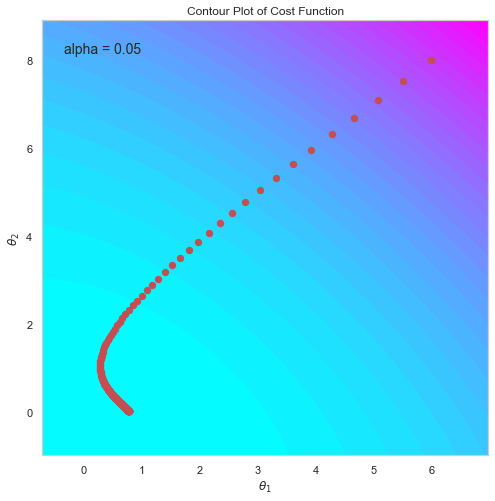

Total no of iterations: 123
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 1.09406740e-02  5.03127007e+00  7.06856877e+00]
 [ 1.68859269e-02  4.21398021e+00  6.26432534e+00]
 [ 1.89911305e-02  3.52539179e+00  5.56891566e+00]
 [ 1.81957941e-02  2.94614438e+00  4.96667914e+00]
 [ 1.52601384e-02  2.45975529e+00  4.44425140e+00]
 [ 1.07957882e-02  2.05219324e+00  3.99022564e+00]
 [ 5.29150047e-03  1.71151508e+00  3.59486407e+00]
 [-8.65295027e-04  1.42755631e+00  3.24985200e+00]
 [-7.37048351e-03  1.19166745e+00  2.94808815e+00]
 [-1.39882260e-02  9.96489355e-01  2.68350605e+00]
 [-2.05384218e-02  8.35761901e-01  2.45092171e+00]
 [-2.68862738e-02  7.04160914e-01  2.24590386e+00]
 [-3.29336223e-02  5.97159291e-01  2.06466325e+00]
 [-3.86117607e-02  5.10908673e-01  1.90395840e+00]
 [-4.38754953e-02  4.42138645e-01  1.76101514e+00]
 [-4.86982462e-02  3.88070866e-01  1.63345808e+00]
 [-5.30680188e-02  3.46345926e-01  1.51925223e+00]
 [-5.69841025e-02  3.14961031e-01  1.41665307e+0

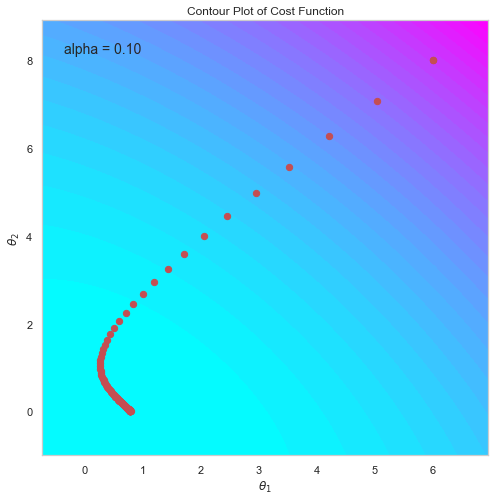

Total no of iterations: 85
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 1.64110110e-02  4.54690510e+00  6.60285315e+00]
 [ 2.15823245e-02  3.43455036e+00  5.49187887e+00]
 [ 1.94133205e-02  2.58619291e+00  4.60513219e+00]
 [ 1.27105742e-02  1.94219198e+00  3.89430390e+00]
 [ 3.46559237e-03  1.45620870e+00  3.32170364e+00]
 [-6.93445030e-03  1.09224966e+00  2.85791145e+00]
 [-1.75472934e-02  8.22366873e-01  2.47994986e+00]
 [-2.77554145e-02  6.24868578e-01  2.16986086e+00]
 [-3.71758002e-02  4.82927312e-01  1.91359807e+00]
 [-4.55925217e-02  3.83497185e-01  1.70016424e+00]
 [-5.29066332e-02  3.16471651e-01  1.52093962e+00]
 [-5.90991893e-02  2.74028402e-01  1.36915898e+00]
 [-6.42041680e-02  2.50119844e-01  1.23950426e+00]
 [-6.82888415e-02  2.40076810e-01  1.12778729e+00]
 [-7.14397241e-02  2.40300395e-01  1.03070260e+00]
 [-7.37526729e-02  2.48022318e-01  9.45634779e-01]
 [-7.53260625e-02  2.61118611e-01  8.70508346e-01]
 [-7.62562176e-02  2.77964771e-01  8.03670698e-01

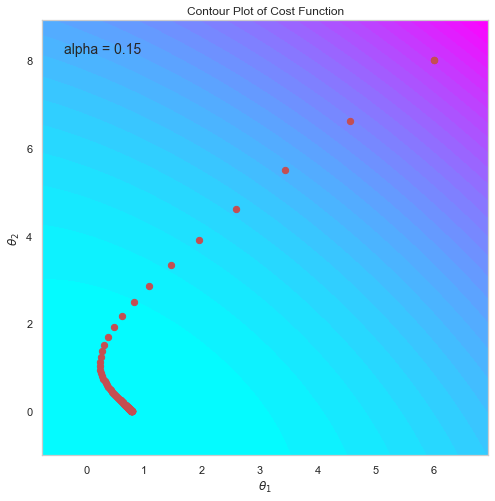

Total no of iterations: 66
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 2.18813480e-02  4.06254013e+00  6.13713753e+00]
 [ 2.37810116e-02  2.73084056e+00  4.78302631e+00]
 [ 1.49419655e-02  1.82299223e+00  3.79083377e+00]
 [ 1.15338183e-03  1.21113722e+00  3.05682322e+00]
 [-1.40789918e-02  8.05454669e-01  2.50764022e+00]
 [-2.87389019e-02  5.42887473e-01  2.09135581e+00]
 [-4.17646354e-02  3.79206680e-01  1.77115601e+00]
 [-5.26915548e-02  2.83425654e-01  1.52089478e+00]
 [-6.14157260e-02  2.33868484e-01  1.32195996e+00]
 [-6.80397098e-02  2.15402994e-01  1.16106384e+00]
 [-7.27737308e-02  2.17493586e-01  1.02868521e+00]
 [-7.58738649e-02  2.32831220e-01  9.17970526e-01]
 [-7.76047120e-02  2.56369642e-01  8.23958427e-01]
 [-7.82180519e-02  2.84647578e-01  7.43032308e-01]
 [-7.79417481e-02  3.15312188e-01  6.72533550e-01]
 [-7.69750657e-02  3.46784173e-01  6.10488073e-01]
 [-7.54878653e-02  3.78022552e-01  5.55412805e-01]
 [-7.36220152e-02  4.08359571e-01  5.06178544e-01

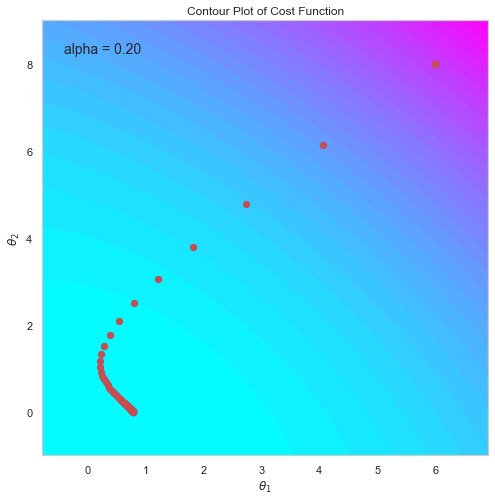

Total no of iterations: 54
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 2.73516850e-02  3.57817516e+00  5.67142191e+00]
 [ 2.34819882e-02  2.10285079e+00  4.13776765e+00]
 [ 6.44359433e-03  1.21873576e+00  3.11225485e+00]
 [-1.41429466e-02  7.02499728e-01  2.41331573e+00]
 [-3.35175097e-02  4.13902028e-01  1.92579802e+00]
 [-4.96447184e-02  2.65005270e-01  1.57649771e+00]
 [-6.19541559e-02  2.00783030e-01  1.31872623e+00]
 [-7.06107994e-02  1.86905939e-01  1.12257328e+00]
 [-7.61033262e-02  2.02050189e-01  9.68760751e-01]
 [-7.90205721e-02  2.33055012e-01  8.44761537e-01]
 [-7.99374608e-02  2.71874822e-01  7.42346721e-01]
 [-7.93631155e-02  3.13661755e-01  6.56034142e-01]
 [-7.77230702e-02  3.55560147e-01  5.82105825e-01]
 [-7.53591652e-02  3.95949291e-01  5.17984639e-01]
 [-7.25377473e-02  4.33968405e-01  4.61837947e-01]
 [-6.94609774e-02  4.69219192e-01  4.12324792e-01]
 [-6.62785142e-02  5.01580102e-01  3.68433964e-01]
 [-6.30982499e-02  5.31090802e-01  3.29379676e-01

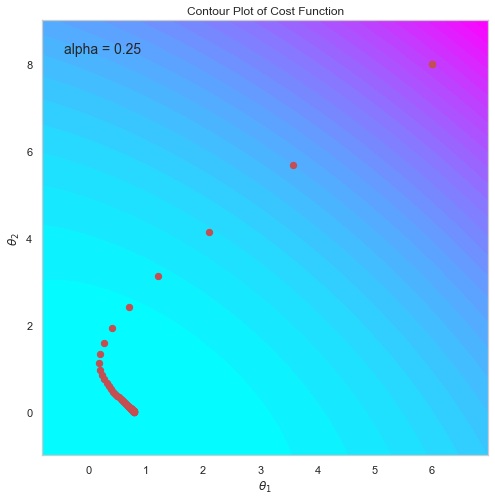

Total no of iterations: 46
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 3.28220219e-02  3.09381020e+00  5.20570630e+00]
 [ 2.06852542e-02  1.55058106e+00  3.55610290e+00]
 [-5.21526415e-03  7.56369526e-01  2.55562988e+00]
 [-3.11693685e-02  3.70866435e-01  1.92690029e+00]
 [-5.20642120e-02  2.05789482e-01  1.51415559e+00]
 [-6.67846813e-02  1.57277073e-01  1.22951583e+00]
 [-7.58946811e-02  1.68308805e-01  1.02304274e+00]
 [-8.05144150e-02  2.07821239e-01  8.66056000e-01]
 [-8.18122102e-02  2.59105894e-01  7.41827569e-01]
 [-8.08028064e-02  3.13367467e-01  6.40384862e-01]
 [-7.82914444e-02  3.66150276e-01  5.55603375e-01]
 [-7.48818575e-02  4.15358585e-01  4.83575816e-01]
 [-7.10078236e-02  4.60162301e-01  4.21693710e-01]
 [-6.69694733e-02  5.00394201e-01  3.68127221e-01]
 [-6.29664318e-02  5.36219751e-01  3.21528014e-01]
 [-5.91251606e-02  5.67957908e-01  2.80857407e-01]
 [-5.55202646e-02  5.95985322e-01  2.45285208e-01]
 [-5.21904966e-02  6.20686448e-01  2.14128708e-01

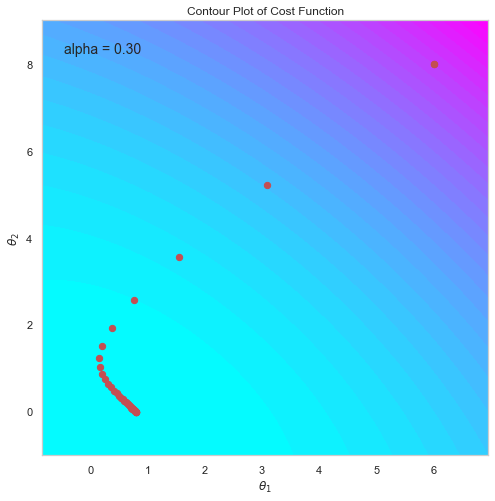

Total no of iterations: 40
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 3.82923589e-02  2.60944523e+00  4.73999068e+00]
 [ 1.53908097e-02  1.07403137e+00  3.03803206e+00]
 [-1.91680811e-02  4.18839563e-01  2.10719331e+00]
 [-4.82406352e-02  1.75891563e-01  1.56473602e+00]
 [-6.78665513e-02  1.21308949e-01  1.22344326e+00]
 [-7.88720563e-02  1.48642492e-01  9.90861163e-01]
 [-8.33810308e-02  2.07841758e-01  8.20610156e-01]
 [-8.34947030e-02  2.75863895e-01  6.88829800e-01]
 [-8.08887927e-02  3.42530773e-01  5.82761668e-01]
 [-7.67700428e-02  4.03733301e-01  4.95198897e-01]
 [-7.19523381e-02  4.58174442e-01  4.21774608e-01]
 [-6.69557570e-02  5.05815381e-01  3.59626636e-01]
 [-6.20942428e-02  5.47140399e-01  3.06731429e-01]
 [-5.75433071e-02  5.82814403e-01  2.61564837e-01]
 [-5.33887780e-02  6.13528040e-01  2.22923760e-01]
 [-4.96604124e-02  6.39931767e-01  1.89827923e-01]
 [-4.63543696e-02  6.62611557e-01  1.61462303e-01]
 [-4.34478625e-02  6.82083604e-01  1.37140814e-01

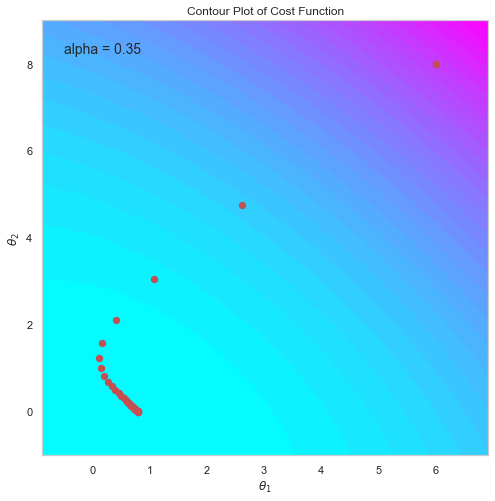

Total no of iterations: 35
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 4.37626959e-02  2.12508026e+00  4.27427506e+00]
 [ 7.59865461e-03  6.73201711e-01  2.58355512e+00]
 [-3.45483275e-02  1.89091892e-01  1.75317958e+00]
 [-6.39952920e-02  8.22966334e-02  1.29802226e+00]
 [-7.98680279e-02  1.14728906e-01  1.01565324e+00]
 [-8.57416190e-02  1.91630229e-01  8.19949921e-01]
 [-8.53373422e-02  2.76340280e-01  6.72953699e-01]
 [-8.14515010e-02  3.55579692e-01  5.56895098e-01]
 [-7.59259089e-02  4.25336312e-01  4.62659599e-01]
 [-6.98778513e-02  4.85150576e-01  3.84994535e-01]
 [-6.39371160e-02  5.35821001e-01  3.20488445e-01]
 [-5.84270258e-02  5.78499161e-01  2.66696794e-01]
 [-5.34875957e-02  6.14346521e-01  2.21746260e-01]
 [-4.91542994e-02  6.44416264e-01  1.84142215e-01]
 [-4.54064460e-02  6.69623338e-01  1.52665132e-01]
 [-4.21959425e-02  6.90747527e-01  1.26307893e-01]
 [-3.94638474e-02  7.08447500e-01  1.04233462e-01]
 [-3.71495186e-02  7.23277256e-01  8.57437720e-02

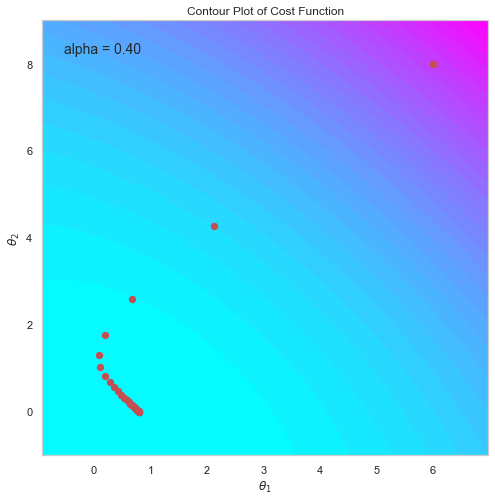

Total no of iterations: 32
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 4.92330329e-02  1.64071530e+00  3.80855944e+00]
 [-2.69121099e-03  3.48092092e-01  2.19267209e+00]
 [-5.04894747e-02  5.00725407e-02  1.47982314e+00]
 [-7.73956784e-02  5.98704580e-02  1.10199861e+00]
 [-8.76710364e-02  1.52517738e-01  8.62549736e-01]
 [-8.79568540e-02  2.56514919e-01  6.90516922e-01]
 [-8.31767850e-02  3.50962778e-01  5.58089637e-01]
 [-7.63310062e-02  4.31318636e-01  4.52729464e-01]
 [-6.90602535e-02  4.98057111e-01  3.67651575e-01]
 [-6.21770732e-02  5.52964245e-01  2.98499216e-01]
 [-5.60278378e-02  5.97966503e-01  2.42125830e-01]
 [-5.07120443e-02  6.34794196e-01  1.96107411e-01]
 [-4.62071878e-02  6.64913567e-01  1.58517146e-01]
 [-4.24368765e-02  6.89540432e-01  1.27801068e-01]
 [-3.93065047e-02  7.09674395e-01  1.02697466e-01]
 [-3.67209805e-02  7.26134497e-01  8.21786500e-02]
 [-3.45927904e-02  7.39590911e-01  6.54062066e-02]
 [-3.28450176e-02  7.50591702e-01  5.16955670e-02

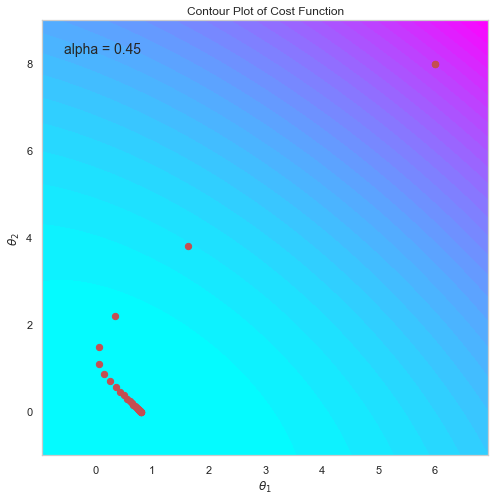

Total no of iterations: 29
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 5.47033699e-02  1.15635033e+00  3.34284383e+00]
 [-1.54787871e-02  9.87025099e-02  1.86538296e+00]
 [-6.61249937e-02 -1.52724665e-02  1.27335843e+00]
 [-8.77279276e-02  8.34691451e-02  9.55944885e-01]
 [-9.13997122e-02  2.11467086e-01  7.44179080e-01]
 [-8.64833259e-02  3.26307321e-01  5.86629379e-01]
 [-7.83715293e-02  4.21179050e-01  4.64226435e-01]
 [-6.97417339e-02  4.97671226e-01  3.67608545e-01]
 [-6.17648756e-02  5.58873558e-01  2.90899070e-01]
 [-5.48538939e-02  6.07722025e-01  2.29859306e-01]
 [-4.90680912e-02  6.46679551e-01  1.81242843e-01]
 [-4.43175205e-02  6.77741100e-01  1.42504415e-01]
 [-4.04613852e-02  7.02505130e-01  1.11630151e-01]
 [-3.73528272e-02  7.22247975e-01  8.70205751e-02]
 [-3.48574727e-02  7.37987648e-01  6.74031308e-02]
 [-3.28595646e-02  7.50535845e-01  5.17644829e-02]
 [-3.12625142e-02  7.60539695e-01  3.92973302e-02]
 [-2.99871727e-02  7.68515108e-01  2.93583382e-02

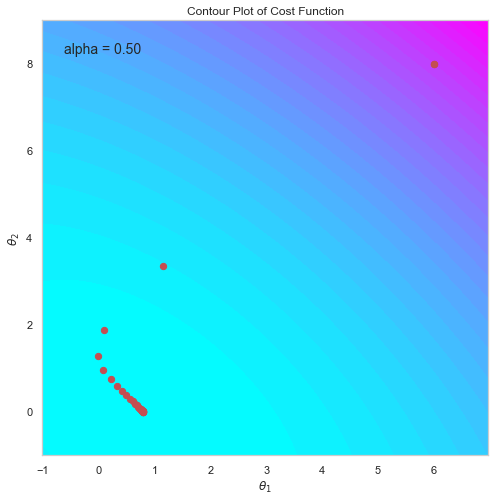

Total no of iterations: 26
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 6.01737069e-02  6.71985361e-01  2.87712821e+00]
 [-3.07640738e-02 -7.49670352e-02  1.60168774e+00]
 [-8.05883557e-02 -2.39971032e-02  1.12001990e+00]
 [-9.46019670e-02  1.33016097e-01  8.43181168e-01]
 [-9.15627775e-02  2.76815196e-01  6.47379835e-01]
 [-8.24282230e-02  3.92577866e-01  4.99361095e-01]
 [-7.21968326e-02  4.83261985e-01  3.85354755e-01]
 [-6.28245599e-02  5.53853257e-01  2.97066673e-01]
 [-5.49016471e-02  6.08722576e-01  2.28571232e-01]
 [-4.84579770e-02  6.51357113e-01  1.75392798e-01]
 [-4.33223853e-02  6.84482610e-01  1.34092119e-01]
 [-3.92743581e-02  7.10219618e-01  1.02010516e-01]
 [-3.61032652e-02  7.30216108e-01  7.70876761e-02]
 [-3.36278308e-02  7.45752503e-01  5.77251015e-02]
 [-3.16993102e-02  7.57823619e-01  4.26818234e-02]
 [-3.01985944e-02  7.67202368e-01  3.09941036e-02]
 [-2.90315537e-02  7.74489265e-01  2.19133545e-02]
 [-2.81243421e-02  7.80150884e-01  1.48580431e-02

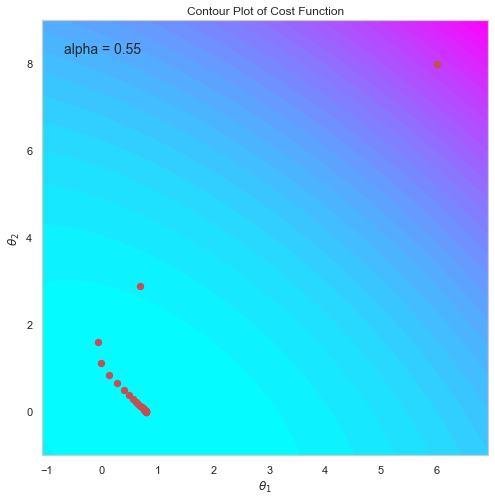

Total no of iterations: 24
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 6.56440439e-02  1.87620394e-01  2.41141259e+00]
 [-4.85470710e-02 -1.72916543e-01  1.40158643e+00]
 [-9.30130318e-02  6.84465650e-03  1.00604200e+00]
 [-9.79515177e-02  1.93502012e-01  7.51067769e-01]
 [-8.89163880e-02  3.40370265e-01  5.64292906e-01]
 [-7.68460730e-02  4.52113536e-01  4.24127084e-01]
 [-6.56131084e-02  5.36727992e-01  3.18384589e-01]
 [-5.62759355e-02  6.00757764e-01  2.38481642e-01]
 [-4.88772254e-02  6.49207064e-01  1.78062651e-01]
 [-4.31460430e-02  6.85867183e-01  1.32361235e-01]
 [-3.87565462e-02  7.13606980e-01  9.77863454e-02]
 [-3.54140752e-02  7.34597087e-01  7.16267436e-02]
 [-3.28765231e-02  7.50479889e-01  5.18332693e-02]
 [-3.09530739e-02  7.62498110e-01  3.68563066e-02]
 [-2.94963092e-02  7.71592081e-01  2.55236649e-02]
 [-2.83934738e-02  7.78473327e-01  1.69485184e-02]
 [-2.75587679e-02  7.83680244e-01  1.04598807e-02]
 [-2.69270770e-02  7.87620228e-01  5.55005224e-03

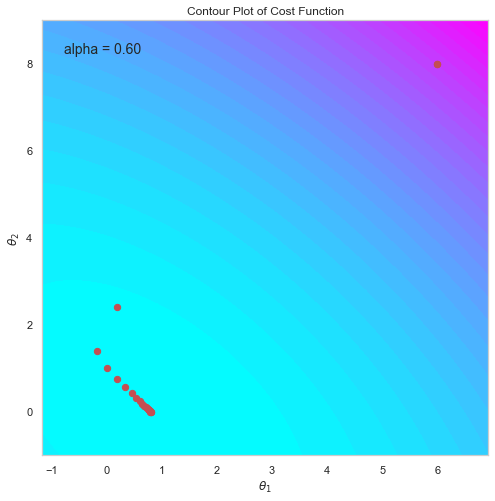

Total no of iterations: 23
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 7.11143809e-02 -2.96744574e-01  1.94569698e+00]
 [-6.88277788e-02 -1.95146014e-01  1.26507902e+00]
 [-1.02532493e-01  6.01988386e-02  9.17659168e-01]
 [-9.80340949e-02  2.54984880e-01  6.71005240e-01]
 [-8.43269792e-02  3.98633791e-01  4.90871659e-01]
 [-7.06106315e-02  5.04408107e-01  3.58678592e-01]
 [-5.92498407e-02  5.82294493e-01  2.61487757e-01]
 [-5.04455031e-02  6.39648135e-01  1.89970320e-01]
 [-4.38095534e-02  6.81882879e-01  1.37323387e-01]
 [-3.88698077e-02  7.12984513e-01  9.85604535e-02]
 [-3.52137205e-02  7.35887846e-01  7.00174840e-02]
 [-3.25149470e-02  7.52753965e-01  4.89990642e-02]
 [-3.05253251e-02  7.65174265e-01  3.35212489e-02]
 [-2.90593804e-02  7.74320646e-01  2.21233879e-02]
 [-2.79795803e-02  7.81056095e-01  1.37299671e-02]
 [-2.71843152e-02  7.86016120e-01  7.54901263e-03]
 [-2.65986445e-02  7.89668712e-01  2.99732416e-03]
 [-2.61673417e-02  7.92358503e-01 -3.54565523e-04

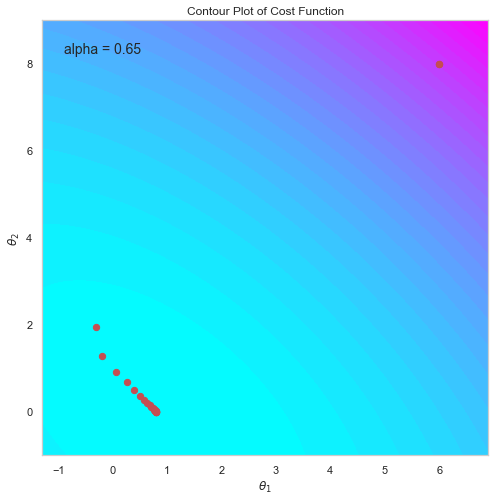

Total no of iterations: 21
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 7.65847179e-02 -7.81109541e-01  1.47998136e+00]
 [-9.16061971e-02 -1.41655448e-01  1.19216552e+00]
 [-1.08280211e-01  1.19011469e-01  8.41105855e-01]
 [-9.54310080e-02  3.12589990e-01  5.98434374e-01]
 [-7.86341123e-02  4.50923918e-01  4.25392033e-01]
 [-6.43529427e-02  5.49985726e-01  3.01758539e-01]
 [-5.34552084e-02  6.20922854e-01  2.13304032e-01]
 [-4.54514774e-02  6.71721961e-01  1.49983954e-01]
 [-3.96603877e-02  7.08100383e-01  1.04645952e-01]
 [-3.54955459e-02  7.34151954e-01  7.21802613e-02]
 [-3.25077206e-02  7.52808227e-01  4.89312721e-02]
 [-3.03664856e-02  7.66168528e-01  3.22821765e-02]
 [-2.88326180e-02  7.75736233e-01  2.03593236e-02]
 [-2.77340314e-02  7.82587950e-01  1.18210326e-02]
 [-2.69472598e-02  7.87494667e-01  5.70651455e-03]
 [-2.63838170e-02  7.91008512e-01  1.32772849e-03]
 [-2.59803153e-02  7.93524881e-01 -1.80804951e-03]
 [-2.56913547e-02  7.95326927e-01 -4.05367293e-03

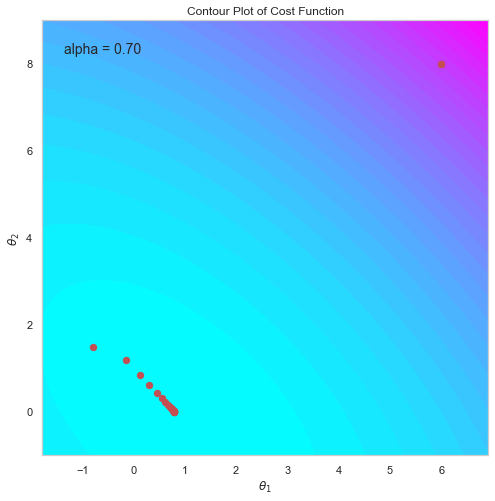

Total no of iterations: 20
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 8.20550549e-02 -1.26547451e+00  1.01426574e+00]
 [-1.16882326e-01 -1.24448448e-02  1.18284593e+00]
 [-1.09389656e-01  1.66228574e-01  7.62616507e-01]
 [-9.10473599e-02  3.66509921e-01  5.32836207e-01]
 [-7.25133212e-02  4.97498787e-01  3.66962655e-01]
 [-5.84655728e-02  5.89557845e-01  2.52417376e-01]
 [-4.83752831e-02  6.53515124e-01  1.72669128e-01]
 [-4.12792960e-02  6.98030639e-01  1.17194197e-01]
 [-3.63227007e-02  7.29005586e-01  7.85931569e-02]
 [-3.28690196e-02  7.50559710e-01  5.17331816e-02]
 [-3.04646174e-02  7.65558195e-01  3.30427134e-02]
 [-2.87912232e-02  7.75994938e-01  2.00369281e-02]
 [-2.76267164e-02  7.83257378e-01  1.09868197e-02]
 [-2.68163733e-02  7.88310970e-01  4.68927517e-03]
 [-2.62524891e-02  7.91827529e-01  3.07109314e-04]
 [-2.58601075e-02  7.94274537e-01 -2.74223459e-03]
 [-2.55870673e-02  7.95977295e-01 -4.86413021e-03]
 [-2.53970713e-02  7.97162165e-01 -6.34065801e-03

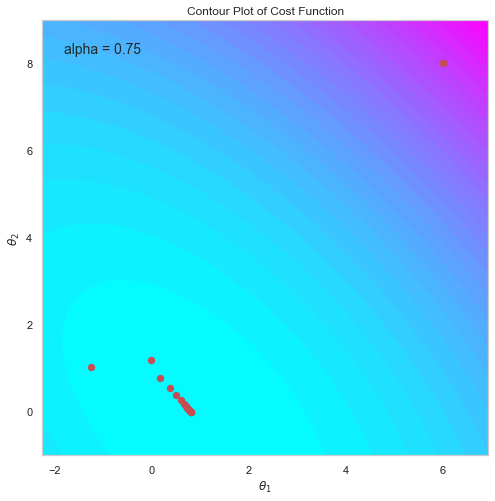

Total no of iterations: 19
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 8.75253919e-02 -1.74983948e+00  5.48550124e-01]
 [-1.44656165e-01  1.92485796e-01  1.23712024e+00]
 [-1.04994300e-01  1.84796178e-01  6.68425569e-01]
 [-8.61120480e-02  4.22004549e-01  4.77732013e-01]
 [-6.63389584e-02  5.37679882e-01  3.14034953e-01]
 [-5.31730151e-02  6.24013498e-01  2.09989352e-01]
 [-4.40266648e-02  6.80832938e-01  1.38522807e-01]
 [-3.78511829e-02  7.19495272e-01  9.04630497e-02]
 [-3.36700943e-02  7.45563798e-01  5.79553602e-02]
 [-3.08454556e-02  7.63184422e-01  3.60014123e-02]
 [-2.89368665e-02  7.75086788e-01  2.11685003e-02]
 [-2.76474640e-02  7.83128065e-01  1.11479838e-02]
 [-2.67763617e-02  7.88560507e-01  4.37831098e-03]
 [-2.61878649e-02  7.92230548e-01 -1.95113785e-04]
 [-2.57902898e-02  7.94709941e-01 -3.28481462e-03]
 [-2.55216973e-02  7.96384961e-01 -5.37214430e-03]
 [-2.53402424e-02  7.97516566e-01 -6.78229570e-03]
 [-2.52176557e-02  7.98281052e-01 -7.73496115e-03

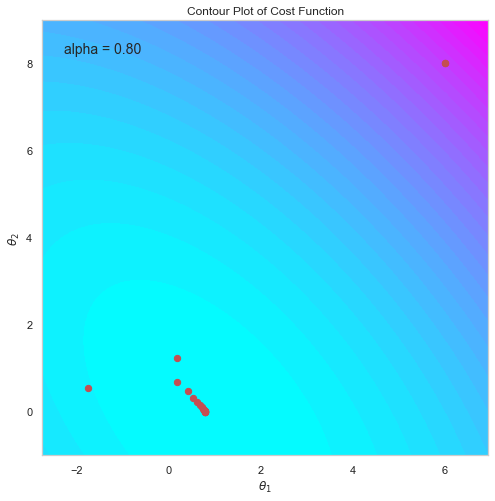

Total no of iterations: 18
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 9.29957288e-02 -2.23420444e+00  8.28345072e-02]
 [-1.74927715e-01  4.73136473e-01  1.35498845e+00]
 [-9.42276138e-02  1.57660309e-01  5.44767488e-01]
 [-8.21777633e-02  4.89401046e-01  4.40683307e-01]
 [-6.00470415e-02  5.67975378e-01  2.62913272e-01]
 [-4.86682684e-02  6.55242924e-01  1.74729193e-01]
 [-4.03264191e-02  7.03206946e-01  1.09655343e-01]
 [-3.50764055e-02  7.37014868e-01  6.88921257e-02]
 [-3.15785555e-02  7.58556487e-01  4.16956889e-02]
 [-2.93009831e-02  7.72830648e-01  2.39987176e-02]
 [-2.78046963e-02  7.82143801e-01  1.23697083e-02]
 [-2.68251513e-02  7.88257205e-01  4.75751047e-03]
 [-2.61830039e-02  7.92260616e-01 -2.32902823e-04]
 [-2.57622691e-02  7.94884750e-01 -3.50257089e-03]
 [-2.54865448e-02  7.96604166e-01 -5.64532730e-03]
 [-2.53058669e-02  7.97730945e-01 -7.04943954e-03]
 [-2.51874676e-02  7.98469313e-01 -7.96956411e-03]]
[[ 16480.80484439  15820.95359229  15175.6565210

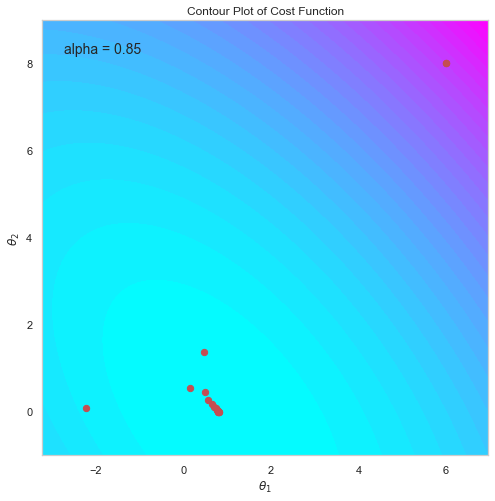

Total no of iterations: 17
THETA [[ 0.00000000e+00  6.00000000e+00  8.00000000e+00]
 [ 9.84660658e-02 -2.71856941e+00 -3.82881110e-01]
 [-2.07696976e-01  8.29507187e-01  1.53645058e+00]
 [-7.62230684e-02  6.77669918e-02  3.77876710e-01]
 [-8.11209908e-02  5.84093875e-01  4.33291847e-01]
 [-5.29980997e-02  5.80203491e-01  2.06264986e-01]
 [-4.53155872e-02  6.87794542e-01  1.49109200e-01]
 [-3.70431796e-02  7.19605151e-01  8.39506080e-02]
 [-3.29141449e-02  7.51918335e-01  5.21487741e-02]
 [-2.99190148e-02  7.68419672e-01  2.87772910e-02]
 [-2.81407912e-02  7.80231460e-01  1.49896474e-02]
 [-2.69705203e-02  7.87289997e-01  5.88457294e-03]
 [-2.62409905e-02  7.91919043e-01  2.18608790e-04]
 [-2.57732033e-02  7.94809929e-01 -3.41788729e-03]
 [-2.54776462e-02  7.96661855e-01 -5.71438543e-03]
 [-2.52894632e-02  7.97832517e-01 -7.17695064e-03]
 [-2.51701275e-02  7.98577691e-01 -8.10430971e-03]]
[[ 21576.78769085  20819.78094493  20077.3283799  ...  21556.90702212
   22328.08926952  23113.8256

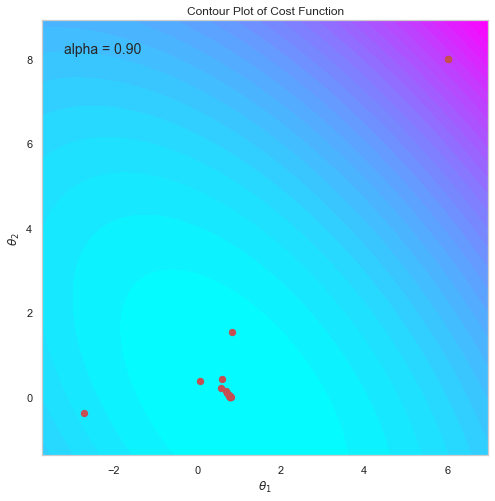

In [41]:
#create an array of learning rates from 0.05 to 0.95 in steps of 0.05
learning_rates = np.arange(0.05, 0.95, 0.05)
# contour_plot(learning_rates)
# k=1
for i in learning_rates:
    #plot a contour plot of the cost function for each learning rate
    #plot subplot for each learning rate
    # plt.subplot(2, 2, k)
    contour(i)
    # k+=1